# **Tesla Stock Market prediction(Short-term)**

In [ ]:
!pip install yfinance

## Create virtual environment and import essential libraries

In [5]:
!python3 -m venv ./.venv && source .venv/bin/activate

In [43]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
ticker='tsla'
df=yfinance.download(ticker,period="5y")

/tmp/ipykernel_7379/1897299707.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yfinance.download(ticker,period="5y")
[*********************100%***********************]  1 of 1 completed


In [34]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-07-13,99.804001,119.666000,98.073997,110.599998,584781000
2020-07-14,101.120003,106.000000,95.400002,103.733330,351271500
2020-07-15,103.067329,103.333336,97.133331,102.866669,245517000
2020-07-16,100.042664,102.113998,97.733330,98.477333,214512000
2020-07-17,100.056000,102.500664,99.333336,100.896667,139950000


In [44]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

## Basic EDA

In [36]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
count,1256.000000,1256.000000,1256.000000,1256.000000,1.256000e+03
mean,241.249240,246.828198,235.467824,241.351301,1.091610e+08
std,69.111407,70.882385,67.439796,69.357591,5.478354e+07
min,91.625999,94.666664,91.000000,93.066666,2.940180e+07
25%,194.327499,198.690002,189.469997,193.966667,7.364078e+07
50%,236.211662,240.308334,231.329994,235.128334,9.755150e+07
75%,280.927498,285.254990,272.918335,280.066681,1.282250e+08
max,479.859985,488.540009,457.510010,475.899994,6.663786e+08


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2020-07-13 to 2025-07-11
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1256 non-null   float64
 1   (High, TSLA)    1256 non-null   float64
 2   (Low, TSLA)     1256 non-null   float64
 3   (Open, TSLA)    1256 non-null   float64
 4   (Volume, TSLA)  1256 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [39]:
len(df)

1256

## Plotting

In [46]:
df["Year"]=df.index.year

In [47]:
plt.figure(figsize=(14,8))

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

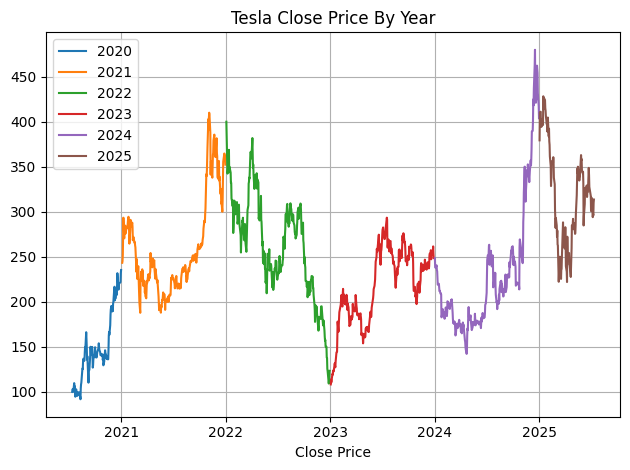

In [51]:
for year,group in df.groupby("Year"):
    plt.plot(group.index, group['Close'], label=str(year))
plt.title("Tesla Close Price By Year")
plt.xlabel("Date")
plt.xlabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

# Preparing Dataset

In [56]:
df["Close_t+1"]=df["Close"].shift(-1)

In [60]:
x=df[["Open","High","Low","Volume","Close"]]

In [61]:
y=df["Close_t+1"]

In [62]:
x

Price,Open,High,Low,Volume,Close
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2020-07-13,110.599998,119.666000,98.073997,584781000,99.804001
2020-07-14,103.733330,106.000000,95.400002,351271500,101.120003
2020-07-15,102.866669,103.333336,97.133331,245517000,103.067329
2020-07-16,98.477333,102.113998,97.733330,214512000,100.042664
2020-07-17,100.896667,102.500664,99.333336,139950000,100.056000
...,...,...,...,...,...
2025-07-03,317.989990,318.450012,312.760010,58042300,315.350006
2025-07-07,291.369995,296.149994,288.769989,131177900,293.940002


In [63]:
y

Date
2020-07-13    101.120003
2020-07-14    103.067329
2020-07-15    100.042664
2020-07-16    100.056000
2020-07-17    109.533333
                 ...    
2025-07-03    293.940002
2025-07-07    297.809998
2025-07-08    295.880005
2025-07-09    309.869995
2025-07-10    313.510010
Name: Close_t+1, Length: 1255, dtype: float64

In [65]:
X_train,x_test,Y_train,y_test=train_test_split(x,y,random_state=43,test_size=0.2)

## Training model

In [69]:
model=LinearRegression()

In [70]:
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
predictions=model.predict(x_test)

In [73]:
x_test.head(1)

Price,Open,High,Low,Volume,Close
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2022-03-08,265.176666,283.329987,260.723328,80399100,274.799988


In [74]:
y_test.head(1)

Date
2022-03-08    286.323334
Name: Close_t+1, dtype: float64

In [77]:
predictions[0]

np.float64(275.24285945719123)

## Score Calculation

In [82]:
# MSE calculating
MSE=mean_squared_error(y_test,predictions)
MSE

94.80011045445922

In [83]:
# R2 Score
R2=r2_score(y_test,predictions)
R2

0.9802101676623398

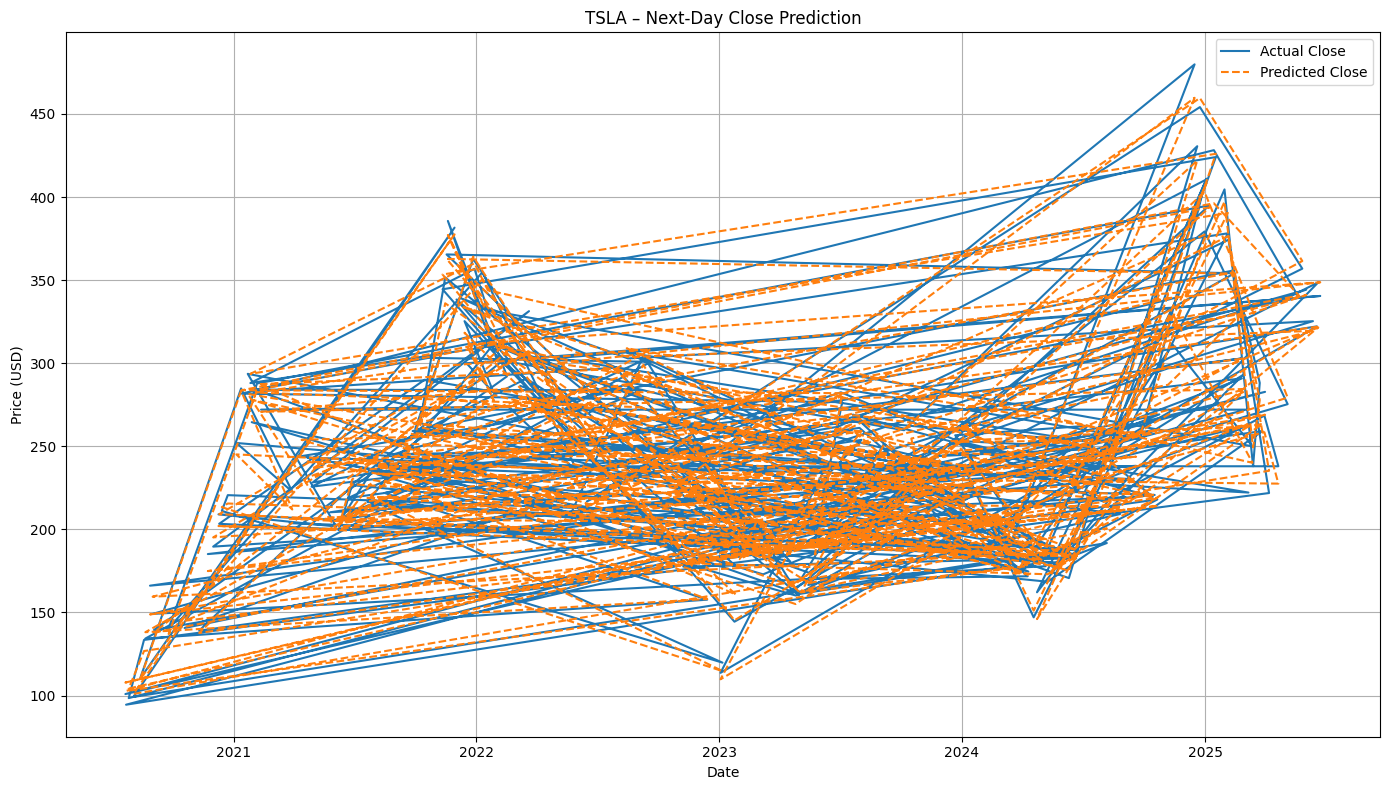

In [86]:
plt.figure(figsize=(14,8))
plt.plot(y_test.index, y_test, label='Actual Close')
plt.plot(y_test.index, predictions, label='Predicted Close', linestyle='--')
plt.title("TSLA – Next-Day Close Prediction")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Predictions Graphs

In [89]:
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions
}, index=y_test.index)

results_df['Year'] = results_df.index.year

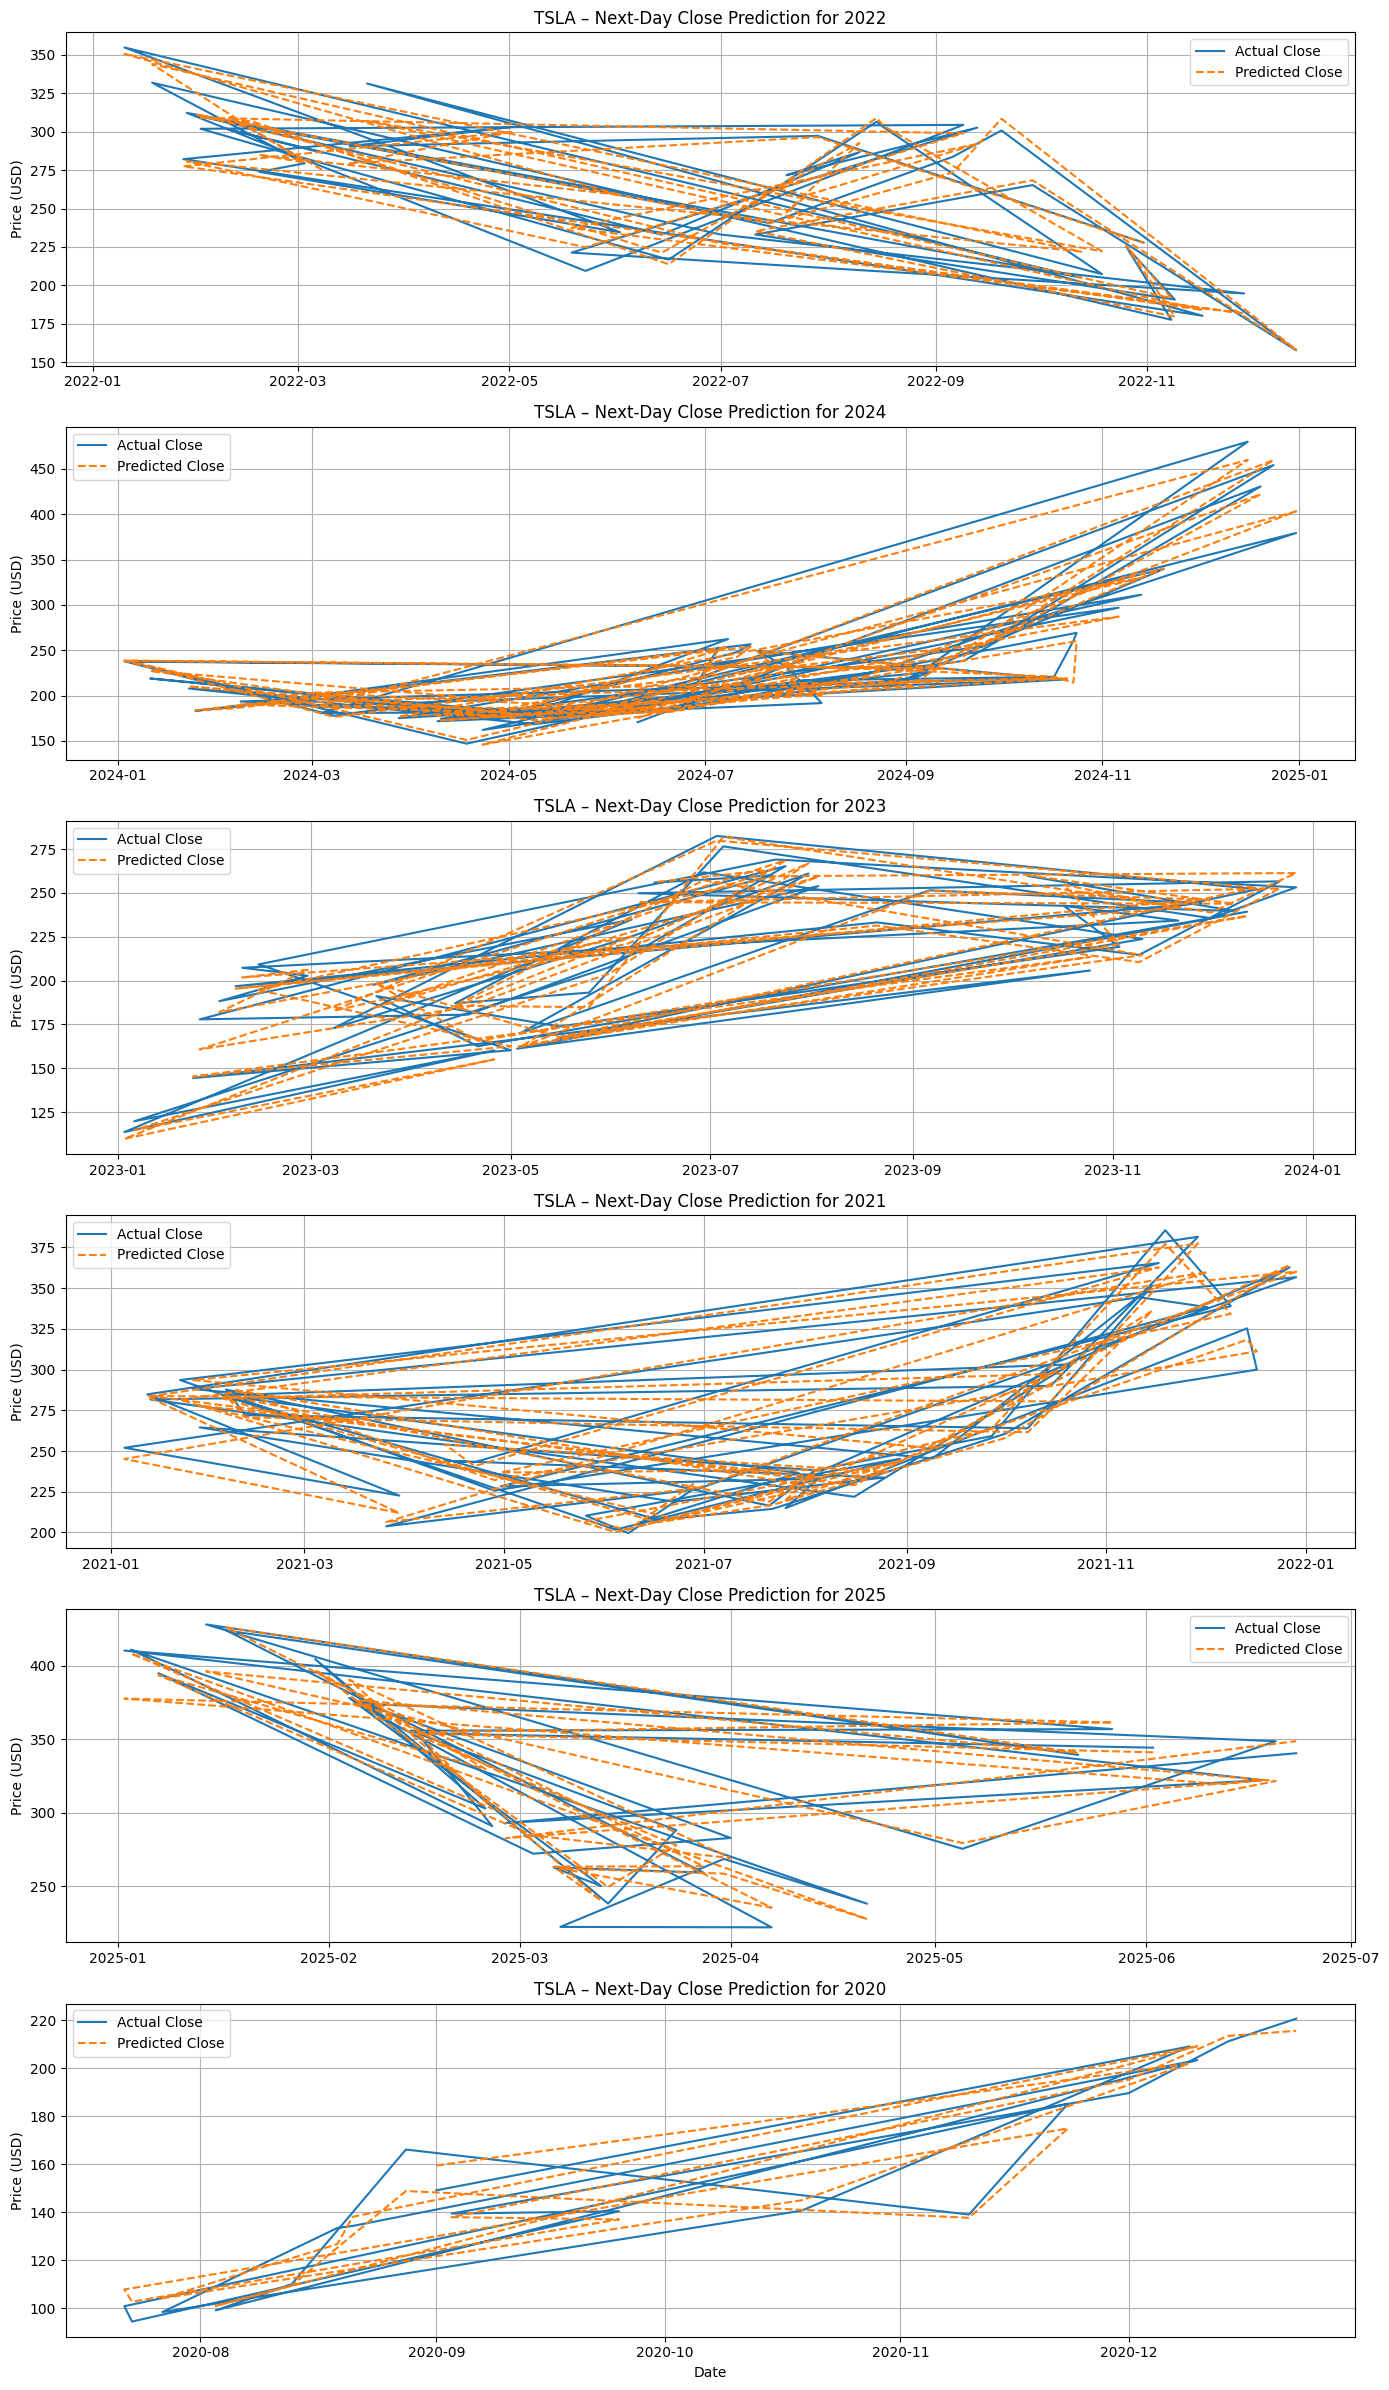

In [92]:
years=results_df['Year'].unique()

# Create subplots
n_years = len(years)
fig, axes = plt.subplots(n_years, 1, figsize=(14, 4 * n_years), sharex=False)

# Ensure axes is iterable
if n_years == 1:
    axes = [axes]

# Plot each year's data
for ax, year in zip(axes, years):
    yearly_data = results_df[results_df['Year'] == year]
    ax.plot(yearly_data.index, yearly_data['Actual'], label='Actual Close')
    ax.plot(yearly_data.index, yearly_data['Predicted'], linestyle='--', label='Predicted Close')
    ax.set_title(f"TSLA – Next-Day Close Prediction for {year}")
    ax.set_ylabel("Price (USD)")
    ax.legend()
    ax.grid(True)

plt.xlabel("Date")
plt.tight_layout()
plt.show()
